## 1. Introduction

At many points in your career, you'll need to be able to build complete, end-to-end data science projects on your own. Data science projects usually consist of one of two things:

- An exploration and analysis of a set of data. One example might involve analyzing donors to political campaigns, creating a plot, and then sharing an analysis of the plot with others.
- An operational system that generates predictions based on data that updates continually. An algorithm that pulls in daily stock ticker data and predicts which stock prices will rise and fall would be one example.

You'll find the ability to create data science projects useful in several different contexts:

- Projects will help you build a portfolio, which is critical to finding a job as a data analyst or scientist.
- Working on projects will help you learn new skills and reinforce existing concepts.
- Most "real-world" data science and analysis work consists of developing internal projects.
- Projects allow you to investigate interesting phenomena and satisfy your curiosity.

Whether you aim to become a data scientist or analyst or you're just curious about the world, building projects can be immensely rewarding.

In this mission, we'll walk through the first part of a complete data science project, including how to acquire the raw data. The project will focus on exploring and analyzing a data set. We'll develop our data cleaning and storytelling skills, which will enable us to build complete projects on our own.

We'll focus primarily on data exploration in this mission. We'll also combine several messy data sets into a single clean one to make analysis easier. Over the next few missions, we'll work through the rest of our project and perform the actual analysis.

The first step in creating a project is to decide on a topic. You want the topic to be something you're interested in and motivated to explore. It's very obvious when people are making projects just to make them, rather than out of a genuine interest in the topic.

Here are two ways to go about finding a good topic:

- Think about what sectors or angles you're really interested in, then find data sets relating to those sectors.
- Review several data sets, and find one that seems interesting enough to explore.

Whichever approach you take, you can start your search at these sites:

- Data.gov - A directory of government data downloads
- /r/datasets - A subreddit that has hundreds of interesting data sets
- Awesome datasets - A list of data sets hosted on GitHub
- rs.io - A great blog post with hundreds of interesting data sets

In real-world data science, you may not find an ideal data set. You might have to aggregate disparate data sources instead, or do a good amount of data cleaning.

For the purposes of this project, we'll be using data about New York City public schools.

## 2. Finding All of the Relevant Data Sets

Once you've chosen a topic, you'll want to pick an angle to investigate. It's important to choose an angle that has enough depth to analyze, but isn't so complicated that it's difficult to get started. You want to finish the project, and you want your results to be interesting to others.

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its data on high school SAT scores available online, as well as the demographics for each high school. The first few rows of the SAT data look like this:

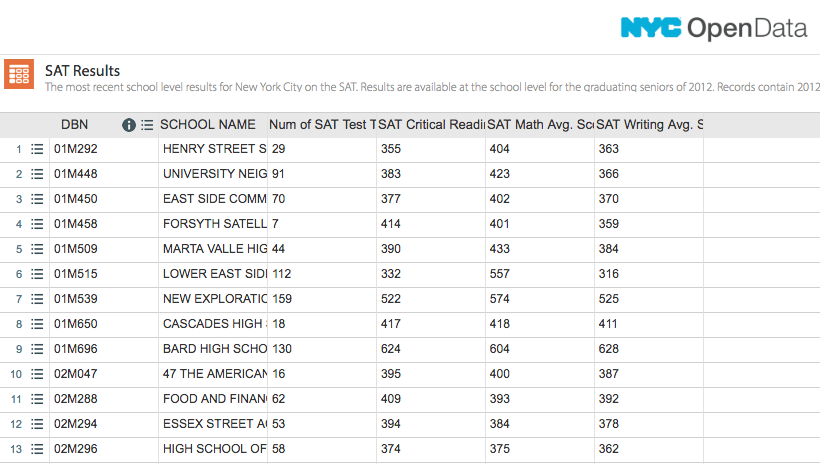

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

- SAT scores by school - SAT scores for each high school in New York City
- School attendance - Attendance information for each school in New York City
- Class size - Information on class size for each school
- AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- Graduation outcomes - The percentage of students who graduated, and other outcome information
- Demographics - Demographic information for each school
- School survey - Surveys of parents, teachers, and students at each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.



## 3. Finding Background Information

Before we move into coding, we'll need to do some background research. A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research will also give us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

- New York City
- The SAT
- Schools in New York City
- Our data

We can learn a few different things from these resources. For example:

- Only high school students take the SAT, so we'll want to focus on high schools.
- New York City is made up of five boroughs, which are essentially distinct regions.
- New York City schools fall within several different school districts, each of which can contains dozens of schools.
- Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
- Each school in New York City has a unique code called a DBN, or district borough number.
- Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.


## 4. Reading in the Data

Once we've done our background research, we're ready to read in the data. For your convenience, we've placed all the data into the schools folder. Here are all of the files in the folder:

- ap_2010.csv - Data on AP test results
- class_size.csv - Data on class size
- demographics.csv - Data on demographics
- graduation.csv - Data on graduation outcomes
- hs_directory.csv - A directory of high schools
- sat_results.csv - Data on SAT scores
- survey_all.txt - Data on surveys from all schools
- survey_d75.txt - Data on surveys from New York City district 75

survey_all.txt and survey_d75.txt are in more complicated formats than the other files. For now, we'll focus on reading in the CSV files only, and then explore them.

We'll read each file into a pandas dataframe, and then store all of the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on.



In [ ]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}